This tutorial has been taken from **[Data School](https://www.youtube.com/channel/UCnVzApLJE2ljPZSeQylSEyg)**. <br>
The link for the tutorial video can be found [here](https://youtu.be/yCgJGsg0Xa4).


In [1]:
import pandas as pd

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [5]:
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [6]:
# The above approach doesn't look so good
ufo['Time'] = pd.to_datetime(ufo.Time)

In [7]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [8]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [9]:
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [20]:
ufo.Time.dt.day_name() # this is the new way - weekday_name is now deprecated

0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
          ...   
18236     Sunday
18237     Sunday
18238     Sunday
18239     Sunday
18240     Sunday
Name: Time, Length: 18241, dtype: object

In [21]:
ufo.Time.dt.weekday

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [23]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [25]:
ts = pd.to_datetime('1/1/1999')

In [27]:
ufo.loc[ufo.Time > ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [29]:
ufo.Time.max() # latest timestamp in the series

Timestamp('2000-12-31 23:59:00')

In [33]:
ufo.Time.max() - ufo.Time.min() # timedelta objects also have attributes

Timedelta('25781 days 01:59:00')

In [34]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [35]:
%matplotlib inline

In [36]:
ufo['Year'] = ufo.Time.dt.year

In [37]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


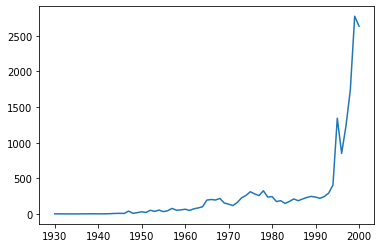

In [39]:
ufo.Year.value_counts().sort_index().plot()